# Dipromats 2024 challenge

## 1 Importing the data

In [9]:
import pandas as pd

en_df = pd.read_json('dipromats24_t1_train_en.json')
sp_df = pd.read_json('dipromats24_t1_train_es.json')

In [2]:
sp_df.head()

,test_case,id,country,username,tweet_type,tweet_id,UTC,rts&fav,language,text,label_task1,label_task2,label_task3
0,DIPROMATS2024-TASK1,0,Russia,embrusiamexico,Reply,1212162072710131712,2020-01-01 00:02:13+00:00,6,es,@mae_rusia @mbellasartes @PalacioOficial @mfa_...,False,[],[]
1,DIPROMATS2024-TASK1,1,Russia,embrusiamexico,Reply,1212164441191649280,2020-01-01 00:11:38+00:00,5,es,@mae_rusia @mbellasartes @PalacioOficial @mfa_...,False,[],[]
2,DIPROMATS2024-TASK1,2,USA,usembassymex,Tweet,1212252277068746752,2020-01-01 06:00:40+00:00,377,es,"Felicidad, paz, prosperidad y todos nuestros m...",True,[1 appeal to commonality],[1 appeal to commonality - flag waving]
3,DIPROMATS2024-TASK1,3,Russia,embrusiaenarges,Tweet,1212400271466389504,2020-01-01 15:48:44+00:00,43,es,Queridos amigos!\n\nDesde la Embajada de #Rusi...,False,[],[]
4,DIPROMATS2024-TASK1,4,USA,usembassyve,Tweet,1212481293100945408,2020-01-01 21:10:41+00:00,1082,es,Desde todo el equipo de la Oficina Externa de ...,False,[],[]


## 2 Analysis of the data

### 2.1 English

In [3]:
num_rows, num_columns = en_df.shape

column_names = en_df.columns.tolist()

print("Number of tweets:", num_rows)
print("Number of features:", num_columns)
print("Features:", column_names)

Number of tweets: 8408
Number of features: 13
Features: ['test_case', 'id', 'country', 'username', 'tweet_type', 'tweet_id', 'UTC', 'rts&fav', 'language', 'text', 'label_task1', 'label_task2', 'label_task3']


In [4]:
print(en_df.isna().any().any())
print(en_df.isnull().any().any())

False
False


#### Example of an English tweet

In [5]:
en_df.loc[66]["text"]

'🇷🇺 FM #Lavrov to 🇺🇸 Secretary #Pompeo: for one State to deliberately kill an official of another State, and that in the territory of a third State, is a grave violation of international law and deserves condemnation. #Iran #Soleimani https://t.co/kpAc3zdQcG'

#### Visualitzation

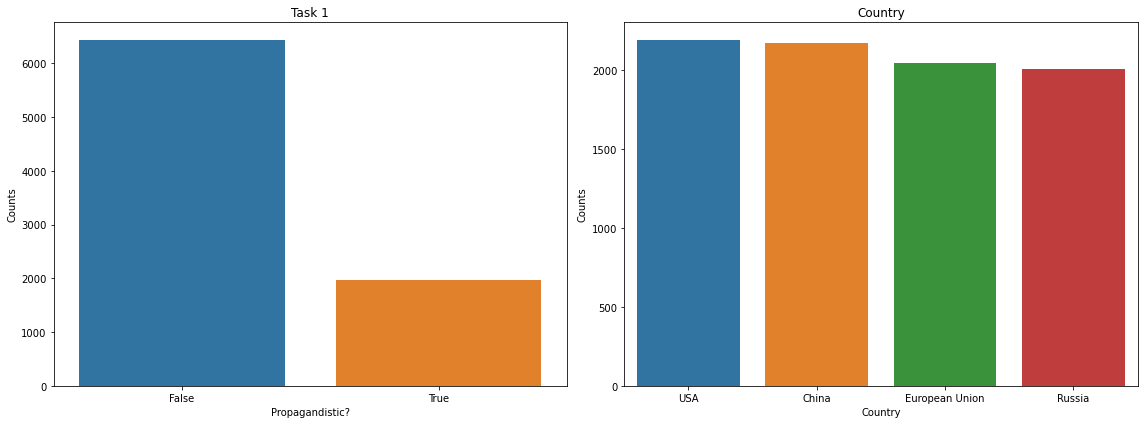

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='label_task1', data=en_df)
plt.title('Task 1')
plt.xlabel('Propagandistic?')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
sns.countplot(x='country', data=en_df)
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [11]:
en_df['UTC'] = pd.to_datetime(en_df['UTC'])

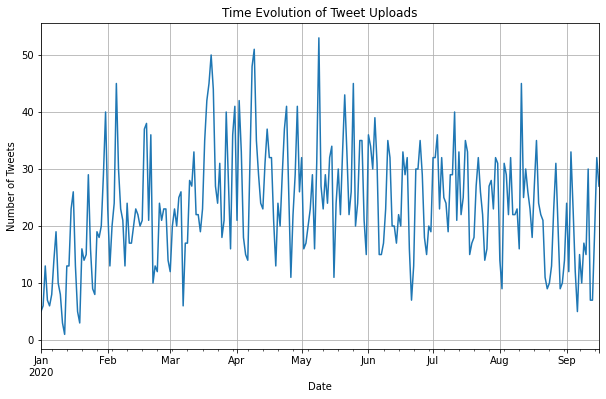

In [17]:
# Set 'time' column as index if it's not already
sp_df.set_index('UTC', inplace=True)

# Resample the data to aggregate tweets by a specific time frequency, e.g., daily
# You can change 'D' to other time frequencies like 'H' for hourly, 'W' for weekly, etc.
tweet_counts = sp_df.resample('D').size()

# Plot the time evolution of tweet uploads
plt.figure(figsize=(10, 6))
tweet_counts.plot()
plt.title('Time Evolution of Tweet Uploads')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

### 2.2 Spanish

In [13]:
num_rows, num_columns = sp_df.shape

column_names = sp_df.columns.tolist()

print("Number of tweets:", num_rows)
print("Number of features:", num_columns)
print("Features:", column_names)

Number of tweets: 6120
Number of features: 13
Features: ['test_case', 'id', 'country', 'username', 'tweet_type', 'tweet_id', 'UTC', 'rts&fav', 'language', 'text', 'label_task1', 'label_task2', 'label_task3']


#### Example of Spanish tweet

In [14]:
sp_df.loc[55]["text"]

'El Consejero de Estado y Ministro de Relaciones Exteriores, Wang Yi, se dirige a #África ✈️ Es el 30º año consecutivo en que África es elegida como el destino de la primera visita del año del ministro de relaciones exteriores de #China 🇨🇳 https://t.co/BjIQKcenq1'

#### Visualitzation

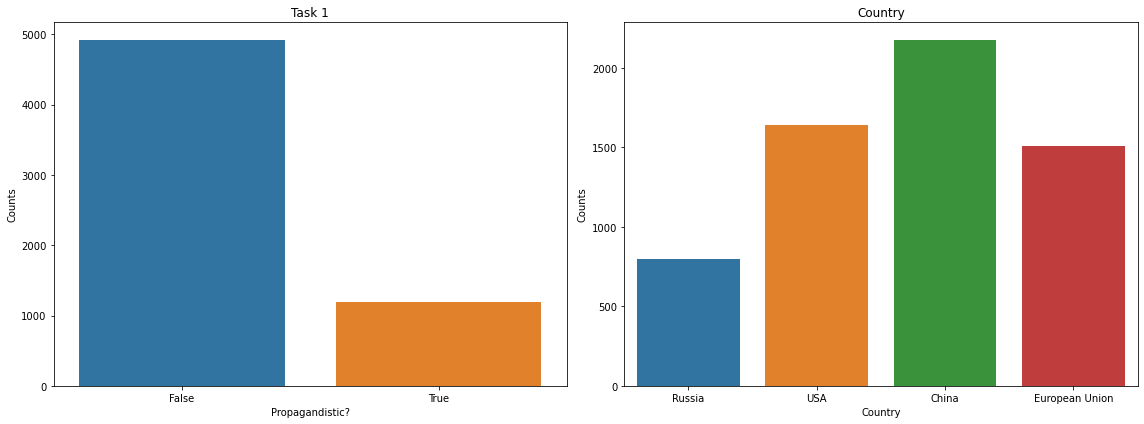

In [15]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='label_task1', data=sp_df)
plt.title('Task 1')
plt.xlabel('Propagandistic?')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
sns.countplot(x='country', data=sp_df)
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [16]:
sp_df['UTC'] = pd.to_datetime(sp_df['UTC'])

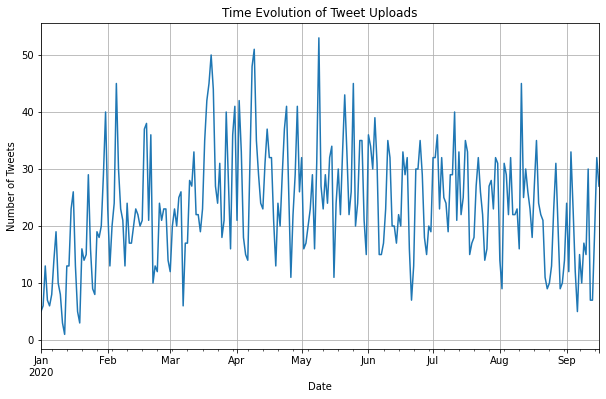

In [17]:
# Set 'time' column as index if it's not already
sp_df.set_index('UTC', inplace=True)

# Resample the data to aggregate tweets by a specific time frequency, e.g., daily
# You can change 'D' to other time frequencies like 'H' for hourly, 'W' for weekly, etc.
tweet_counts = sp_df.resample('D').size()

# Plot the time evolution of tweet uploads
plt.figure(figsize=(10, 6))
tweet_counts.plot()
plt.title('Time Evolution of Tweet Uploads')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()